<a href="https://colab.research.google.com/github/Joseph-Willem-Ricci/5450-final-project/blob/joanne/CIS5450_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIT 5450 Final Project
Joanne Crean, Juan Goleniowski, Joseph Ricci

Before running, be sure to create a new Kaggle API token and save it as 'kaggle.json' in your default Google Drive location (/content/drive/MyDrive/)

In [2]:
# Installs
!pip install -q kaggle
!pip install pandasql
!pip install sqlalchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=e9319dbddb0b22278a25cb622da30372d74a4c6cdbd0b1d5af78970464c9e238
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9


In [3]:
# Imports
import pandas as pd
import pandasql as ps
from google.colab import drive
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Setup
drive.mount('/content/drive')
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

Mounted at /content/drive


In [5]:
# Download Datasets
# Spotify Top 200 and Viral 50 Charts for 2017 through 2021 Dataset
!!kaggle datasets download -d dhruvildave/spotify-charts

# Spotify Audio Features Datasets
!!kaggle datasets download -d rodolfofigueroa/spotify-12m-songs
!!kaggle datasets download -d muhmores/spotify-top-100-songs-of-20152019
!!kaggle datasets download -d sashankpillai/spotify-top-200-charts-20202021
!!kaggle datasets download -d maharshipandya/-spotify-tracks-dataset
!!kaggle datasets download -d vatsalmavani/spotify-dataset
!!kaggle datasets download -d nandhakumarss/spotify-song-tracks
!!kaggle datasets download -d elemento/music-albums-popularity-prediction

# TikTok Popular Songs Dataset
!!kaggle datasets download -d sveta151/tiktok-popular-songs-2019
!!kaggle datasets download -d sveta151/tiktok-popular-songs-2020
!!kaggle datasets download -d sveta151/tiktok-popular-songs-2021

['Downloading tiktok-popular-songs-2021.zip to /content',
 '',
 '  0% 0.00/11.0k [00:00<?, ?B/s]',
 '',
 '100% 11.0k/11.0k [00:00<00:00, 4.93MB/s]']

In [6]:
# Unzip Datasets
!unzip /content/spotify-charts.zip
!unzip /content/spotify-12m-songs.zip
!unzip /content/spotify-top-100-songs-of-20152019.zip
!unzip /content/spotify-top-200-charts-20202021.zip
!unzip /content/-spotify-tracks-dataset.zip
!unzip /content/spotify-dataset.zip
!unzip /content/spotify-song-tracks.zip
!unzip /content/music-albums-popularity-prediction.zip
!unzip /content/tiktok-popular-songs-2019
!unzip /content/tiktok-popular-songs-2020
!unzip /content/tiktok-popular-songs-2021

Archive:  /content/spotify-charts.zip
  inflating: charts.csv              
Archive:  /content/spotify-12m-songs.zip
  inflating: tracks_features.csv     
Archive:  /content/spotify-top-100-songs-of-20152019.zip
  inflating: Spotify 2010 - 2019 Top 100 Songs.xlsx  
  inflating: Spotify 2010 - 2019 Top 100.csv  
Archive:  /content/spotify-top-200-charts-20202021.zip
  inflating: spotify_dataset.csv     
Archive:  /content/-spotify-tracks-dataset.zip
  inflating: dataset.csv             
Archive:  /content/spotify-dataset.zip
  inflating: data/data.csv           
  inflating: data/data_by_artist.csv  
  inflating: data/data_by_genres.csv  
  inflating: data/data_by_year.csv   
  inflating: data/data_w_genres.csv  
Archive:  /content/spotify-song-tracks.zip
  inflating: SpotifyFeatures.csv     
Archive:  /content/music-albums-popularity-prediction.zip
  inflating: sample_solution.csv     
  inflating: test.csv                
  inflating: train.csv               
Archive:  /content/tiktok

In [7]:
# Clean up directory to save space
!rm sample_data/*
!rm -d sample_data
!rm ./*.zip
!rm sample_solution.csv
!rm ./*.xlsx

In [8]:
# Read the csv files and save them to pandas dataframes
df_charts = pd.read_csv('charts.csv')
df_song_features_1 = pd.read_csv('tracks_features.csv')
df_song_features_2 = pd.read_csv('Spotify 2010 - 2019 Top 100.csv')
df_song_features_3 = pd.read_csv('spotify_dataset.csv')
df_song_features_4 = pd.read_csv('dataset.csv')
df_song_features_5 = pd.read_csv('data/data.csv')
df_song_features_6 = pd.read_csv('SpotifyFeatures.csv')
df_song_features_7 = pd.read_csv('train.csv')
df_song_features_10 = pd.read_csv('test.csv')
df_tiktok_19 = pd.read_csv('TikTok_songs_2019.csv')
df_tiktok_20 = pd.read_csv('TikTok_songs_2020.csv')
df_tiktok_21 = pd.read_csv('TikTok_songs_2021.csv')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Clean up remaining files
!rm data/*
!rm -d data
!rm ./*.csv

# Spotify Top 200 and Viral 50 Charts EDA

In [11]:
# Create a separate column for Year
df_charts['Year']=df_charts['date'].str.slice(stop=4)

# Cast 'Year' as Int
df_charts['Year'] = df_charts['Year'].astype(int)

# Show datatypes 
df_charts.dtypes

#remove ID, trend and streams columns
df_charts.drop(['url', 'trend', 'streams'], axis=1, inplace=True)

df_charts.dropna(inplace=True)

In [12]:
# Number of records per year
df_charts.groupby(by='Year', as_index=False).count()

,Year,title,rank,date,artist,region,chart
0,2017,4401145,4401145,4401145,4401145,4401145,4401145
1,2018,4863016,4863016,4863016,4863016,4863016,4863016
2,2019,5412658,5412658,5412658,5412658,5412658,5412658
3,2020,5793130,5793130,5793130,5793130,5793130,5793130
4,2021,5703536,5703536,5703536,5703536,5703536,5703536


In [13]:
# Remove records with year 2017 and 2018
df_charts=df_charts[df_charts['Year'] > 2018]

In [14]:
# Top 50 artists in the 2019-2021 period by number of days in the top position

query = """SELECT artist, count(date) as 'days as number 1'
FROM df_charts
WHERE rank == 1
GROUP BY artist
ORDER BY count(date) DESC
LIMIT 50
"""

"""sql_top_50_artists = ps.sqldf(query, locals())"""

'sql_top_50_artists = ps.sqldf(query, locals())'

In [15]:
"""sql_top_50_artists"""

'sql_top_50_artists'

In [16]:
# Top 50 songs in the 2019-2021 period by number of days in the top position

query = """SELECT title, count(date) as 'days as number 1'
FROM df_charts
WHERE rank == 1
GROUP BY title
ORDER BY count(date) DESC
LIMIT 50
"""

"""sql_top_50_songs = ps.sqldf(query, locals())"""

'sql_top_50_songs = ps.sqldf(query, locals())'

In [17]:
"""sql_top_50_songs"""

'sql_top_50_songs'

In [18]:
# Top 50 longest trending songs in the US in the 2019-2021 period

query = """SELECT title, count(date) as 'days trending'
FROM df_charts
WHERE region == 'United States'
GROUP BY title
ORDER BY count(date) DESC
LIMIT 50
"""

"""sql_top_50_longest_trending_songs = ps.sqldf(query, locals())"""

'sql_top_50_longest_trending_songs = ps.sqldf(query, locals())'

In [19]:
"""sql_top_50_longest_trending_songs"""

'sql_top_50_longest_trending_songs'

In [20]:
# Top 50 longest trending songs outside of the US in the 2019-2021 period

query = """SELECT title, count(date) as 'days trending'
FROM df_charts
WHERE region != 'United States'
GROUP BY title
ORDER BY count(date) DESC
LIMIT 50
"""

"""sql_top_50_longest_trending_ROW_songs = ps.sqldf(query, locals())"""

'sql_top_50_longest_trending_ROW_songs = ps.sqldf(query, locals())'

In [21]:
"""sql_top_50_longest_trending_ROW_songs"""

'sql_top_50_longest_trending_ROW_songs'

# Spotify Audio Feature Dataset EDA

Since the Spotify Top 200 and Viral 50 charts dataset does not come with audio features the songs, there is no guarantee that we can find datasets that include audio features for all of the songs in the charts. One relevant question to explore is therefore

1. Can we find audio feature data for a suitably "big" fraction of the songs in the Charts dataset?

Additionally, since we'll be combining multiple audio features datasets, there is no guarantee that those datasets share the same features, so

2. What fields do the datasets share?

In [22]:
# First, since we want to find song features for as many of the songs in 'df_charts' as possible, let's start by
# projecting df_charts by song title and artist name, which will uniquely identify each song, and then dropping duplicates
df_charts_songs_artists = df_charts[['title', 'artist']].drop_duplicates()

# Next, let's join the features datasets on song title and artist name and see what percentage of songs in charts_df
# each song features dataset can provide features for

# Clean extranneous characters from artist columns if necessary
df_song_features_1['artists'] = df_song_features_1['artists'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
df_song_features_5['artists'] = df_song_features_5['artists'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
df_song_features_7['artists'] = df_song_features_7['artists'].str.replace(', ', '')
df_song_features_10['artists'] = df_song_features_10['artists'].str.replace(', ', '')

In [23]:
# Rename song title "title" and "artist" columns in each dataframe and 
# create separate dataframes for features_7 and features_10, which each have three columns for each field for three different songs
df_song_features_1 = df_song_features_1.rename(columns={'name': 'title', 'artists': 'artist'})
# _song_features_2 already has fields 'title' and 'artist'
df_song_features_3 = df_song_features_3.rename(columns={'Song Name': 'title', 'Artist': 'artist'})
df_song_features_4 = df_song_features_4.rename(columns={'track_name': 'title', 'artists': 'artist'})
df_song_features_5 = df_song_features_5.rename(columns={'name': 'title', 'artists': 'artist'})
df_song_features_6 = df_song_features_6.rename(columns={'track_name': 'title', 'artist_name': 'artist'})
df_song_features_8 = df_song_features_7.rename(columns={'t_name1': 'title', 'artists': 'artist'}).drop(columns=['t_name0', 't_name2', 't_dur0', 't_dur2', 't_dance0', 't_dance2', 't_energy0', 't_energy2', 't_key0', 't_key2', 't_mode0', 't_mode2', 't_speech0', 't_speech2', 't_acous0', 't_acous2', 't_ins0', 't_ins2', 't_live0', 't_live2', 't_val0', 't_val2', 't_tempo0', 't_tempo2', 't_sig0', 't_sig2'])
df_song_features_9 = df_song_features_7.rename(columns={'t_name2': 'title', 'artists': 'artist'}).drop(columns=['t_name0', 't_name1', 't_dur0', 't_dur1', 't_dance0', 't_dance1', 't_energy0', 't_energy1', 't_key0', 't_key1', 't_mode0', 't_mode1', 't_speech0', 't_speech1', 't_acous0', 't_acous1', 't_ins0', 't_ins1', 't_live0', 't_live1', 't_val0', 't_val1', 't_tempo0', 't_tempo1', 't_sig0', 't_sig1'])
df_song_features_7 = df_song_features_7.rename(columns={'t_name0': 'title', 'artists': 'artist'}).drop(columns=['t_name1', 't_name2', 't_dur1', 't_dur2', 't_dance1', 't_dance2', 't_energy1', 't_energy2', 't_key1', 't_key2', 't_mode1', 't_mode2', 't_speech1', 't_speech2', 't_acous1', 't_acous2', 't_ins1', 't_ins2', 't_live1', 't_live2', 't_val1', 't_val2', 't_tempo1', 't_tempo2', 't_sig1', 't_sig2'])
df_song_features_11 = df_song_features_10.rename(columns={'t_name1': 'title', 'artists': 'artist'}).drop(columns=['t_name0', 't_name2', 't_dur0', 't_dur2', 't_dance0', 't_dance2', 't_energy0', 't_energy2', 't_key0', 't_key2', 't_mode0', 't_mode2', 't_speech0', 't_speech2', 't_acous0', 't_acous2', 't_ins0', 't_ins2', 't_live0', 't_live2', 't_val0', 't_val2', 't_tempo0', 't_tempo2', 't_sig0', 't_sig2'])
df_song_features_12 = df_song_features_10.rename(columns={'t_name2': 'title', 'artists': 'artist'}).drop(columns=['t_name0', 't_name1', 't_dur0', 't_dur1', 't_dance0', 't_dance1', 't_energy0', 't_energy1', 't_key0', 't_key1', 't_mode0', 't_mode1', 't_speech0', 't_speech1', 't_acous0', 't_acous1', 't_ins0', 't_ins1', 't_live0', 't_live1', 't_val0', 't_val1', 't_tempo0', 't_tempo1', 't_sig0', 't_sig1'])
df_song_features_10 = df_song_features_10.rename(columns={'t_name0': 'title', 'artists': 'artist'}).drop(columns=['t_name1', 't_name2', 't_dur1', 't_dur2', 't_dance1', 't_dance2', 't_energy1', 't_energy2', 't_key1', 't_key2', 't_mode1', 't_mode2', 't_speech1', 't_speech2', 't_acous1', 't_acous2', 't_ins1', 't_ins2', 't_live1', 't_live2', 't_val1', 't_val2', 't_tempo1', 't_tempo2', 't_sig1', 't_sig2'])

# Project only the necessary columns from each feature dataset and also rename to maintain consistency
features_1_projected = df_song_features_1[['title', 'artist']]
features_2_projected = df_song_features_2[['title', 'artist']]
features_3_projected = df_song_features_3[['title', 'artist']]
features_4_projected = df_song_features_4[['title', 'artist']]
features_5_projected = df_song_features_5[['title', 'artist']]
features_6_projected = df_song_features_6[['title', 'artist']]
features_7_projected = df_song_features_7[['title', 'artist']]
features_8_projected = df_song_features_8[['title', 'artist']]
features_9_projected = df_song_features_9[['title', 'artist']]
features_10_projected = df_song_features_10[['title', 'artist']]
features_11_projected = df_song_features_11[['title', 'artist']]
features_12_projected = df_song_features_12[['title', 'artist']]
all_songs_with_features = pd.concat([features_1_projected, features_2_projected, features_3_projected, features_4_projected, 
                                     features_5_projected, features_6_projected, features_7_projected, features_8_projected, 
                                     features_9_projected, features_10_projected, features_11_projected, features_12_projected], ignore_index=True).drop_duplicates()

# Join on song title and artist name
feature_matches = pd.merge(df_charts_songs_artists, all_songs_with_features, on=['title', 'artist'], how='inner')

# Calculate the percentage of songs each features dataset was able to provide song features for
match_percentage_combined = 100 * feature_matches.shape[0] / df_charts_songs_artists.shape[0]
print("We are able to provide audio features for " + str(round(match_percentage_combined,2)) + "% of songs in df_charts,"\
      " for a total of " + str(feature_matches.shape[0]) + " out of " + str(df_charts_songs_artists.shape[0]) + " songs")

We are able to provide audio features for 16.48% of songs in df_charts, for a total of 18950 out of 115014 songs


Lets now see whether we can do any additional cleaning to boost our match percentage. Since there are many obscure songs in df_charts that have, say, reached chart position 200 in small countries like Latvia and Ecuador, let us limit our search to songs that charted highly in the United States, and see if any of those songs were unmatched in the features data

In [24]:
non_matches = pd.merge(df_charts[df_charts['rank'] > 10][df_charts['region'] == 'United States'][['title', 'artist']], 
                                  all_songs_with_features, on=['title', 'artist'], how='left', indicator=True).drop_duplicates()
non_matches = non_matches[non_matches['_merge'] == 'left_only']
non_matches.head()

<ipython-input-24-b56ed4472038>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_matches = pd.merge(df_charts[df_charts['rank'] > 10][df_charts['region'] == 'United States'][['title', 'artist']],


,title,artist,_merge
23,Walk Em Down (feat. Roddy Ricch),"Roddy Ricch, NLE Choppa",left_only
53,Social Distancing,Lil Baby,left_only
58,Coffee,"Quinn XCII, Marc E. Bassy",left_only
73,Eleven (feat. Summer Walker),Khalid,left_only
121,Low Down,Lil Baby,left_only


In [25]:
# Does all_songs_with_features contain any of these songs but perhaps with a different format for title and artist?
print(all_songs_with_features[all_songs_with_features['artist'] == 'NLE Choppa, Roddy Ricch'])

                                   title                   artist
991025  Walk Em Down (feat. Roddy Ricch)  NLE Choppa, Roddy Ricch


This suggests that when there is a featured artist, the ordering of the artist names in the features datasets may be the opposite of the ordering in the charts dataset. Lets look at the other row with a featured artist.

In [26]:
print(all_songs_with_features[all_songs_with_features['artist'] == "Khalid, Summer Walker"])

                                title                 artist
1111433  Eleven (feat. Summer Walker)  Khalid, Summer Walker


In this case, the featured artist is not included in the 'artist' column in the charts dataset, but is in the features datasets. In joins so far, we have been joining on 'artist' and 'title' to be sure to uniquely identify each song. But since these songs with featured artists have varying formats in the 'artist' column, but the same format in the 'title' column, and since they are sure to be uniquely identified just by song title, let us try to filter by songs that have "(feat. " in their title, and join the charts and features datasets on 'title'.

In [27]:
charts_featured = df_charts_songs_artists[df_charts_songs_artists['title'].str.contains("\(feat\. ")][['title', 'artist']]
featured_feature_matches = pd.merge(charts_featured, all_songs_with_features, on=['title'], how='inner').drop_duplicates(subset='title')
featured_feature_matches = featured_feature_matches.rename(columns={'artist_x': 'artist'})
feature_matches = pd.concat([feature_matches, featured_feature_matches], ignore_index=True).drop_duplicates(subset = ['title', 'artist'])
match_percentage_combined = 100 * feature_matches.shape[0] / df_charts_songs_artists.shape[0]
print("We are able to provide audio features for " + str(round(match_percentage_combined,2)) + "% of songs in df_charts,"\
      " for a total of " + str(feature_matches.shape[0]) + " out of " + str(df_charts_songs_artists.shape[0]) + " songs")

We are able to provide audio features for 17.45% of songs in df_charts, for a total of 20075 out of 115014 songs


In [28]:
feature_matches.head()

,title,artist,artist_y
0,Ride It,Regard,NaN
1,+Linda,Dalex,NaN
2,Woah,Lil Baby,NaN
3,25/8,Bad Bunny,NaN
4,Keii,Anuel AA,NaN


There is one more case that might result in two rows for the same song in different dataframes not to match. We can see that the song title is always the same for the same song between datasets, but we get into trouble when multiple artists are on the same song. This need not be when there is a "featured artist". So let us match on song title and when `all_songs_with_features['artist']` contains one artist that is contained as a substring in the artists in df_charts

In [29]:
# match df_charts and all_songs_with_features only on the title to start with. There will be many incorrect matches when two artists have songs by the same name
feature_charts_substr_match = pd.merge(df_charts_songs_artists, all_songs_with_features, on=['title'], how='inner')
feature_charts_substr_match['actual_match'] = feature_charts_substr_match[['artist_x', 'artist_y']].apply(lambda x: x['artist_y'].split(',')[0] in x['artist_x'] and x['artist_y'] != x['artist_x'], axis=1)
feature_charts_substr_match = feature_charts_substr_match[feature_charts_substr_match['actual_match'] == True].rename(columns={'artist_x': 'artist'})
feature_charts_substr_match.head()

,title,artist,artist_y,actual_match
93,Woah,"Calinacho, Ian, Azteca",Calinacho,True
1563,Elegí (feat. Dímelo Flow),"Rauw Alejandro, Dalex, Lenny Tavárez","Rauw Alejandro, Dalex, Lenny Tavárez, Dímelo Flow",True
1699,Sigues Con El,"Arcangel, Sech, Dímelo Flow","Dímelo Flow, Arcangel, Sech",True
2434,Fantasias,"Menor Menor, El Alfa, Lary Over, Rvssian",Menor Menor,True
2477,Roses - Imanbek Remix,SAINt JHN,"SAINt JHN, Imanbek",True


We can see here many songs that aren't necessarily "featured artist" songs, that have different formats in the artist column.

In [30]:
feature_charts_substr_match = feature_charts_substr_match.drop_duplicates(subset=['title', 'artist'])
feature_matches = pd.concat([feature_matches, feature_charts_substr_match], ignore_index=True).drop_duplicates()
feature_matches.drop(columns=['actual_match'], inplace=True)
match_percentage_combined = 100 * feature_matches.shape[0] / df_charts_songs_artists.shape[0]
print("We are able to provide audio features for " + str(round(match_percentage_combined,2)) + "% of songs in df_charts,"\
      " for a total of " + str(feature_matches.shape[0]) + " out of " + str(df_charts_songs_artists.shape[0]) + " songs")

We are able to provide audio features for 20.7% of songs in df_charts, for a total of 23804 out of 115014 songs


In [31]:
feature_matches.head()

,title,artist,artist_y
0,Ride It,Regard,NaN
1,+Linda,Dalex,NaN
2,Woah,Lil Baby,NaN
3,25/8,Bad Bunny,NaN
4,Keii,Anuel AA,NaN


Next, lets see what columns each of the features datasets share, and create one unified features dataset.

In [32]:
print([col for col in df_song_features_1.columns])
print([col for col in df_song_features_2.columns])
print([col for col in df_song_features_3.columns])
print([col for col in df_song_features_4.columns])
print([col for col in df_song_features_5.columns])
print([col for col in df_song_features_6.columns])
print([col for col in df_song_features_7.columns])
print([col for col in df_song_features_8.columns])
print([col for col in df_song_features_9.columns])
print([col for col in df_song_features_10.columns])
print([col for col in df_song_features_11.columns])
print([col for col in df_song_features_12.columns])

['id', 'title', 'album', 'album_id', 'artist', 'artist_ids', 'track_number', 'disc_number', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'year', 'release_date']
['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year', 'artist type']
['Index', 'Highest Charting Position', 'Number of Times Charted', 'Week of Highest Charting', 'title', 'Streams', 'artist', 'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Chord']
['Unnamed: 0', 'track_id', 'artist', 'album_name', 'title', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',

Common columns:

title, artist, tempo, energy, danceability, liveness, valence, duration, acousticness, speechiness

In [33]:
features_1_drop_cols = ['loudness', 'album', 'id', 'album_id', 'artist_ids', 'track_number', 'disc_number', 'explicit', 'key', 'mode', 'instrumentalness', 'time_signature', 'year', 'release_date']
features_2_drop_cols = ['dB', 'year released', 'added', 'pop', 'top year', 'artist type', 'top genre']
features_3_drop_cols = ['Chord', 'Loudness', 'Index', 'Highest Charting Position', 'Number of Times Charted', 'Week of Highest Charting', 'Streams', 'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted', 'Popularity']
features_4_drop_cols = ['loudness', 'Unnamed: 0', 'track_id', 'album_name', 'popularity', 'explicit', 'key', 'mode', 'instrumentalness', 'time_signature', 'track_genre']
features_5_drop_cols = ['loudness', 'year', 'explicit', 'id', 'instrumentalness', 'key', 'mode', 'popularity', 'release_date']
features_6_drop_cols = ['loudness', 'genre', 'track_id', 'popularity', 'instrumentalness', 'key', 'mode', 'time_signature']
features_7_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key0', 't_mode0', 't_ins0', 't_sig0', 'popularity']
features_8_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key1', 't_mode1', 't_ins1', 't_sig1', 'popularity']
features_9_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key2', 't_mode2', 't_ins2', 't_sig2', 'popularity']
features_10_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key0', 't_mode0', 't_ins0', 't_sig0']
features_11_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key1', 't_mode1', 't_ins1', 't_sig1']
features_12_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key2', 't_mode2', 't_ins2', 't_sig2']

features_2_rename_map = {'bpm': 'tempo', 'nrgy': 'energy', 'dnce': 'danceability', 'live': 'liveness', 'val': 'valence', 'dur': 'duration_ms', 'acous': 'acousticness', 'spch': 'speechiness'}
features_3_rename_map = {'Danceability': 'danceability', 'Energy': 'energy', 'Speechiness': 'speechiness', 'Acousticness': 'acousticness', 'Liveness': 'liveness', 'Tempo': 'tempo', 'Duration (ms)': 'duration_ms', 'Valence': 'valence'}
features_7_rename_map = {'t_dance0': 'danceability', 't_energy0': 'energy', 't_speech0': 'speechiness', 't_acous0': 'acousticness', 't_live0': 'liveness', 't_tempo0': 'tempo', 't_dur0': 'duration_ms', 't_val0': 'valence'}
features_8_rename_map = {'t_dance1': 'danceability', 't_energy1': 'energy', 't_speech1': 'speechiness', 't_acous1': 'acousticness', 't_live1': 'liveness', 't_tempo1': 'tempo', 't_dur1': 'duration_ms', 't_val1': 'valence'}
features_9_rename_map = {'t_dance2': 'danceability', 't_energy2': 'energy', 't_speech2': 'speechiness', 't_acous2': 'acousticness', 't_live2': 'liveness', 't_tempo2': 'tempo', 't_dur2': 'duration_ms', 't_val2': 'valence'}
features_10_rename_map = {'t_dance0': 'danceability', 't_energy0': 'energy', 't_speech0': 'speechiness', 't_acous0': 'acousticness', 't_live0': 'liveness', 't_tempo0': 'tempo', 't_dur0': 'duration_ms', 't_val0': 'valence'}
features_11_rename_map = {'t_dance1': 'danceability', 't_energy1': 'energy', 't_speech1': 'speechiness', 't_acous1': 'acousticness', 't_live1': 'liveness', 't_tempo1': 'tempo', 't_dur1': 'duration_ms', 't_val1': 'valence'}
features_12_rename_map = {'t_dance2': 'danceability', 't_energy2': 'energy', 't_speech2': 'speechiness', 't_acous2': 'acousticness', 't_live2': 'liveness', 't_tempo2': 'tempo', 't_dur2': 'duration_ms', 't_val2': 'valence'}

df_song_features_1 = df_song_features_1.drop(columns=features_1_drop_cols)
df_song_features_2 = df_song_features_2.drop(columns=features_2_drop_cols).rename(columns=features_2_rename_map)
df_song_features_3 = df_song_features_3.drop(columns=features_3_drop_cols).rename(columns=features_3_rename_map)
df_song_features_4 = df_song_features_4.drop(columns=features_4_drop_cols)
df_song_features_5 = df_song_features_5.drop(columns=features_5_drop_cols)
df_song_features_6 = df_song_features_6.drop(columns=features_6_drop_cols)
df_song_features_7 = df_song_features_7.drop(columns=features_7_drop_cols).rename(columns=features_7_rename_map)
df_song_features_8 = df_song_features_8.drop(columns=features_8_drop_cols).rename(columns=features_8_rename_map)    
df_song_features_9 = df_song_features_9.drop(columns=features_9_drop_cols).rename(columns=features_9_rename_map)
df_song_features_10 = df_song_features_10.drop(columns=features_10_drop_cols).rename(columns=features_10_rename_map)
df_song_features_11 = df_song_features_11.drop(columns=features_11_drop_cols).rename(columns=features_11_rename_map)
df_song_features_12 = df_song_features_12.drop(columns=features_12_drop_cols).rename(columns=features_12_rename_map)

Check that all features dataframes have the same columns now:

In [34]:
print(([col for col in df_song_features_1.columns.sort_values()]))
print(([col for col in df_song_features_2.columns.sort_values()]))
print(([col for col in df_song_features_3.columns.sort_values()]))
print(([col for col in df_song_features_4.columns.sort_values()]))
print(([col for col in df_song_features_5.columns.sort_values()]))
print(([col for col in df_song_features_6.columns.sort_values()]))
print(([col for col in df_song_features_7.columns.sort_values()]))
print(([col for col in df_song_features_8.columns.sort_values()])) 
print(([col for col in df_song_features_9.columns.sort_values()]))
print(([col for col in df_song_features_10.columns.sort_values()]))
print(([col for col in df_song_features_11.columns.sort_values()]))
print(([col for col in df_song_features_12.columns.sort_values()]))

['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acoust

Now lets concatenate all of these features dataframes into one and do an inner join with `feature_matches`, the songs with features that are in `df_charts` to get the final, combined features dataset

In [35]:
df_features = pd.concat([df_song_features_1, df_song_features_2, df_song_features_3, df_song_features_4, df_song_features_5, df_song_features_6, df_song_features_7, df_song_features_8, df_song_features_9, df_song_features_10, df_song_features_11, df_song_features_12], axis=0, ignore_index=True)
df_features = df_features.dropna()
df_features_artist_format_1 = pd.merge(df_features, feature_matches, left_on=['title', 'artist'], right_on=['title', 'artist_y'], how='inner', suffixes=("", "_x"))  # 'artist' in the format of df_charts
df_features_artist_format_2 = pd.merge(df_features, feature_matches, on=['title', 'artist'], how='inner')  # 'artist' in the format of features dfs

In [36]:
df_features_artist_format_1.drop_duplicates(subset=['title', 'artist_y'], inplace=True)
df_features_artist_format_1.drop(columns=['artist', 'artist_y'], inplace=True)
df_features_artist_format_1.rename(columns={'artist_x': 'artist'}, inplace=True)
df_features_artist_format_2.drop_duplicates(subset=['title', 'artist'], inplace=True)
df_features_artist_format_2.drop(columns=['artist_y'], inplace=True)

In [37]:
df_features_artist_format_1.head()

,title,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms,artist
0,Cry Baby (feat. DaBaby),0.955,0.436,0.38,0.00527,0.169,0.559,130.041,137984,Megan Thee Stallion
2,Do It On The Tip (feat. City Girls & Hot Girl ...,0.944,0.526,0.289,0.00281,0.0862,0.619,97.543,167370,Megan Thee Stallion
6,Movie (feat. Lil Durk),0.896,0.728,0.287,0.00245,0.128,0.877,152.062,227375,Megan Thee Stallion
10,Freaky Girls (feat. SZA),0.816,0.666,0.176,0.000707,0.156,0.25,93.952,166906,Megan Thee Stallion
14,Intercourse (feat. Popcaan & Mustard),0.8,0.596,0.239,0.0775,0.201,0.424,98.037,197023,Megan Thee Stallion


In [38]:
df_features_artist_format_2.head()

,title,artist,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,Sleep Now In the Fire,Rage Against The Machine,0.426,0.929,0.0701,0.00162,0.0789,0.539,127.059,205600
7,Swear It Again - Radio Edit,Westlife,0.626,0.532,0.0276,0.296,0.123,0.33,130.076,247933
10,If I Let You Go - Radio Edit,Westlife,0.571,0.697,0.0294,0.00574,0.0775,0.636,181.987,221533
13,Flying Without Wings,Westlife,0.443,0.493,0.0318,0.323,0.21,0.283,72.742,215307
16,Fool Again,Westlife,0.532,0.526,0.0292,0.0468,0.053,0.536,75.996,235067


In [39]:
df_features = pd.concat([df_features_artist_format_2, df_features_artist_format_1]).drop_duplicates()
df_features.reset_index(drop=True, inplace=True)
df_features.shape[0]

22758

In [40]:
df_features.head()

,title,artist,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,Sleep Now In the Fire,Rage Against The Machine,0.426,0.929,0.0701,0.00162,0.0789,0.539,127.059,205600
1,Swear It Again - Radio Edit,Westlife,0.626,0.532,0.0276,0.296,0.123,0.33,130.076,247933
2,If I Let You Go - Radio Edit,Westlife,0.571,0.697,0.0294,0.00574,0.0775,0.636,181.987,221533
3,Flying Without Wings,Westlife,0.443,0.493,0.0318,0.323,0.21,0.283,72.742,215307
4,Fool Again,Westlife,0.532,0.526,0.0292,0.0468,0.053,0.536,75.996,235067


In [41]:
from google.colab import files
df_lyrics_list = df_features[['artist', 'title']]

df_lyrics_list.to_csv('df_features.csv')
files.download('df_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Join with `df_charts` to get a unified dataframe with chart and feature columns

In [42]:
df_charts_features = pd.merge(df_charts.drop_duplicates(subset=['title', 'artist']), df_features, on=['title', 'artist'], how='inner')
df_charts_features.describe

<bound method NDFrame.describe of                                             title  rank        date  \
0                                         Ride It   146  2020-05-01   
1                                          +Linda   147  2020-05-01   
2                                            Woah   148  2020-05-01   
3                                            25/8   105  2020-05-01   
4                                            Keii    65  2020-05-01   
...                                           ...   ...         ...   
22753                                   Optimista    49  2021-07-24   
22754                               Forget Me Not    42  2021-07-26   
22755                                      めちゃくちゃ    50  2021-07-27   
22756  Still Holy (feat. Ryan Ofei & Naomi Raine)    47  2021-07-28   
22757                                     Believe    50  2021-07-31   

                           artist        region    chart  Year danceability  \
0                          Regard 

# TikTok Popular Songs Dataset EDA

In [43]:
df_tiktok_19.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.00221,0.000003,0.486,0.790,150.034,4,179947
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.75900,0.232000,0.100,0.749,75.221,4,160000
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.72600,0.000006,0.122,0.758,118.050,4,215507
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.06690,0.000000,0.274,0.811,97.984,4,200594
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.03800,0.000006,0.183,0.957,92.998,4,235760


In [44]:
df_tiktok_20.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Say So,Doja Cat,88,Hot Pink,80,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893
1,Blinding Lights,The Weeknd,93,After Hours,90,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040
2,Supalonely (feat. Gus Dapperton),BENEE,67,Hey u x,63,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488
3,Savage,Megan Thee Stallion,82,Suga,70,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497
4,Moral of the Story,Ashe,68,Moral of the Story,76,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084


In [45]:
df_tiktok_21.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,STAY (with Justin Bieber),The Kid LAROI,83,STAY (with Justin Bieber),89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806
1,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,Justice,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082
2,edamame (feat. Rich Brian),bbno$,72,edamame (feat. Rich Brian),77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707
3,Here's Your Perfect,Jamie Miller,65,Here's Your Perfect,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594
4,It's You,Sezairi,57,It's You,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440


In [46]:
# Combine the tiktok datasets
data_tiktok = [df_tiktok_19, df_tiktok_20, df_tiktok_21]
df_tiktok_full = pd.concat(data_tiktok)

In [47]:
# Extract the track name and artist to check for the overlap
df_tiktok_tracks = df_tiktok_full[['track_name', 'artist_name']]

# Check number of rows
df_tiktok_tracks.shape[0]

705

In [48]:
# Merge with spotify features on track names only to check overlap
df_tiktok_tracks_only = feature_matches.merge(df_tiktok_tracks.drop_duplicates(), left_on = ['title'], right_on=['track_name'], how='inner')

# Check overlap
df_tiktok_tracks_only.shape[0]

716

In [49]:
# Review rows that didn't match to see if there's more clean-up that can be done 
df_tiktok_full_merge = feature_matches.merge(df_tiktok_tracks.drop_duplicates(), left_on = ['title'], right_on=['track_name'], how='outer', indicator = True)

In [50]:
df_tiktok_full_merge.head()

,title,artist,artist_y,track_name,artist_name,_merge
0,Ride It,Regard,NaN,Ride It,Regard,both
1,+Linda,Dalex,NaN,NaN,NaN,left_only
2,Woah,Lil Baby,NaN,NaN,NaN,left_only
3,Woah,"Calinacho, Ian, Azteca",Calinacho,NaN,NaN,left_only
4,25/8,Bad Bunny,NaN,NaN,NaN,left_only


In [51]:
# Review rows that didn't match to see if there's more clean-up that can be done 
print(df_tiktok_full_merge[df_tiktok_full_merge['_merge'] != 'both'])

        title                  artist   artist_y  \
1      +Linda                   Dalex        NaN   
2        Woah                Lil Baby        NaN   
3        Woah  Calinacho, Ian, Azteca  Calinacho   
4        25/8               Bad Bunny        NaN   
5        Keii                Anuel AA        NaN   
...       ...                     ...        ...   
24000     NaN                     NaN        NaN   
24001     NaN                     NaN        NaN   
24002     NaN                     NaN        NaN   
24003     NaN                     NaN        NaN   
24004     NaN                     NaN        NaN   

                                   track_name    artist_name      _merge  
1                                         NaN            NaN   left_only  
2                                         NaN            NaN   left_only  
3                                         NaN            NaN   left_only  
4                                         NaN            NaN   left_only  


In [52]:
# do a check to see if I convert the track names to lower case, could I get more matches 
df_tiktok_full_merge.dropna(inplace = True)
df_tiktok_full_merge['title_l'] = df_tiktok_full_merge.apply(lambda x : x['title'].lower(), axis =1)
df_tiktok_full_merge['track_name_l'] = df_tiktok_full_merge.apply(lambda x : x['track_name'].lower(), axis =1)

print(df_tiktok_full_merge[(df_tiktok_full_merge['title_l'] == df_tiktok_full_merge['track_name_l']) & (df_tiktok_full_merge['_merge'] != 'both')])

# prints an empty dataframe so the conclusion is that no I can't

Empty DataFrame
Columns: [title, artist, artist_y, track_name, artist_name, _merge, title_l, track_name_l]
Index: []


In [53]:
# Create a match column to indicate cases where the tiktok artist name can be found as a substring in the spotify artist column 
df_tiktok_tracks_only['match'] = df_tiktok_tracks_only.apply(lambda x: x['artist_name'].lower().find(x['artist'].lower()), axis=1).ge(0)

# Create a match column to indicate cases where the spotify artist column can be found as a substring in the tiktok artist name 
df_tiktok_tracks_only['match_2'] = df_tiktok_tracks_only.apply(lambda x: x['artist'].lower().find(x['artist_name'].lower()), axis=1).ge(0)

In [54]:
# review data to see which rows have matched
print(df_tiktok_tracks_only[df_tiktok_tracks_only['match'] |df_tiktok_tracks_only['match_2']])

                            title                          artist  \
0                         Ride It                          Regard   
1                           GOOBA                         6ix9ine   
2                          Ransom                       Lil Tecca   
3                 Don't Start Now                        Dua Lipa   
4           Roses - Imanbek Remix                       SAINt JHN   
..                            ...                             ...   
711                           WTF              Young Spool, JAKOB   
712  The Weekend - Funk Wav Remix              SZA, Calvin Harris   
713                     Crimewave         Crystal Castles, HEALTH   
714                  Eenie Meenie    Sean Kingston, Justin Bieber   
715                     Give Love  AKMU, 서기, 신승익, 이찬혁, LEE SUHYUN   

                         artist_y                    track_name  \
0                             NaN                       Ride It   
1                             NaN    

In [55]:
# review data to see which rows have not matched
print(df_tiktok_tracks_only[(df_tiktok_tracks_only['match'] == False) & (df_tiktok_tracks_only['match_2'] == False)])

                   title                                   artist artist_y  \
8        Blinding Lights                                  Ouvindo      NaN   
10                  Tutu                              Grupo Sigma      NaN   
15                Say So  Poorchoice, Cam Sanders, Veronica Bravo      NaN   
16                Say So                              Masked Wolf      NaN   
20               Falling                             Harry Styles      NaN   
..                   ...                                      ...      ...   
628          Baby Powder                                Jenevieve      NaN   
641  MIDDLE OF THE NIGHT                                 Monsta X      NaN   
661             Sunshine                              Young Dolph      NaN   
662             Sunshine                              OneRepublic      NaN   
679                Yours                                      JIN      NaN   

              track_name    artist_name  match  match_2  
8    

In [56]:
# check the rows where the artists names aren't an exact match - for visual inspection 
df_tiktok_tracks_only.loc[(df_tiktok_tracks_only['artist'] != df_tiktok_tracks_only['artist_name']) & (df_tiktok_tracks_only['match'] |df_tiktok_tracks_only['match_2'])]

,title,artist,artist_y,track_name,artist_name,match,match_2
6,Roses - Imanbek Remix,"SAINt JHN, Fedez, Dargen D'Amico",SAINt JHN,Roses - Imanbek Remix,SAINt JHN,False,True
9,Tutu,"Camilo, Pedro Capó",NaN,Tutu,Camilo,False,True
11,death bed (coffee for your head),"Powfu, beabadoobee",NaN,death bed (coffee for your head),Powfu,False,True
12,death bed (coffee for your head),"Powfu, beabadoobee",Powfu,death bed (coffee for your head),Powfu,False,True
31,Savage Remix (feat. Beyoncé),"Beyoncé, Megan Thee Stallion",NaN,Savage Remix (feat. Beyoncé),Megan Thee Stallion,False,True
...,...,...,...,...,...,...,...
711,WTF,"Young Spool, JAKOB",Young Spool,WTF,Young Spool,False,True
712,The Weekend - Funk Wav Remix,"SZA, Calvin Harris","SZA, Calvin Harris, Funk Wav",The Weekend - Funk Wav Remix,SZA,False,True
713,Crimewave,"Crystal Castles, HEALTH",Crystal Castles,Crimewave,Crystal Castles,False,True
714,Eenie Meenie,"Sean Kingston, Justin Bieber",Sean Kingston,Eenie Meenie,Sean Kingston,False,True


In [57]:
# Create a dataframe of overlapping songs based on the two matches colums and drop duplicates
df_tiktok_matches_final = df_tiktok_tracks_only.loc[(df_tiktok_tracks_only['match'] |df_tiktok_tracks_only['match_2'])]

# Check the shape of the df 
df_tiktok_matches_final.shape[0]

525

In [58]:
# spot check an artist to see if the name matching looks appropriate 
df_tiktok_matches_final.loc[(df_tiktok_matches_final['artist_name'] == "Justin Bieber" )|( df_tiktok_matches_final['artist'] == "Justin Bieber" )]

,title,artist,artist_y,track_name,artist_name,match,match_2
93,Baby,"Justin Bieber, Ludacris",NaN,Baby,Justin Bieber,False,True
96,Baby,"Justin Bieber, Ludacris",Justin Bieber,Baby,Justin Bieber,False,True
300,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,NaN,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,True,True
378,Hold On,Justin Bieber,NaN,Hold On,Justin Bieber,True,True
392,Ghost,Justin Bieber,NaN,Ghost,Justin Bieber,True,True


In [59]:
# drop rows that are no longer needed
df_tiktok_matches_final = df_tiktok_matches_final.drop(['match', 'match_2', 'track_name', 'artist_name', 'artist_y'], axis =1)

# add a column to indicate tiktok popularity 
df_tiktok_matches_final= df_tiktok_matches_final.assign(tiktok_pop = 1)

In [60]:
# to delete
"""df_tiktok_matches_final = df_tiktok_matches_final.drop(['artist_y'], axis =1)"""

"df_tiktok_matches_final = df_tiktok_matches_final.drop(['artist_y'], axis =1)"

In [61]:
df_tiktok_matches_final.head()

,title,artist,tiktok_pop
0,Ride It,Regard,1
1,GOOBA,6ix9ine,1
2,Ransom,Lil Tecca,1
3,Don't Start Now,Dua Lipa,1
4,Roses - Imanbek Remix,SAINt JHN,1


In [62]:
df_tiktok_matches_final.groupby(['tiktok_pop']).count()

,title,artist
tiktok_pop,,
1,525,525


In [63]:
# merge the tiktok data with the charts/features data
df_charts_features_tik = pd.merge(df_charts_features, df_tiktok_matches_final, on=['title', 'artist'], how='left')

# replace nan with 0 for tiktok popularity boolean
df_charts_features_tik['tiktok_pop'] = df_charts_features_tik['tiktok_pop'].fillna(0)
df_charts_features_tik
df_charts_features_tik.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22912 entries, 0 to 22911
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         22912 non-null  object 
 1   rank          22912 non-null  int64  
 2   date          22912 non-null  object 
 3   artist        22912 non-null  object 
 4   region        22912 non-null  object 
 5   chart         22912 non-null  object 
 6   Year          22912 non-null  int64  
 7   danceability  22912 non-null  object 
 8   energy        22912 non-null  object 
 9   speechiness   22912 non-null  object 
 10  acousticness  22912 non-null  object 
 11  liveness      22912 non-null  object 
 12  valence       22912 non-null  object 
 13  tempo         22912 non-null  object 
 14  duration_ms   22912 non-null  object 
 15  tiktok_pop    22912 non-null  float64
dtypes: float64(1), int64(2), object(13)
memory usage: 3.0+ MB


# Genius Lyrics Dataset Creation and EDA

In [64]:
!pip install lyricsgenius

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 2.9 MB/s eta 0:00:00


In [65]:
"""from google.colab import files
feature_matches.to_csv('combined_features.csv') 
files.download('combined_features.csv')"""

"from google.colab import files\nfeature_matches.to_csv('combined_features.csv') \nfiles.download('combined_features.csv')"

In [66]:
import lyricsgenius
import os
import spacy
import re

In [67]:
client_id = 'TS15U5iwbWLGkhfGFVqnOuDA9mVjJhhLlXpJDYai6nm79S9JWFzznlsQN5dCFuZG'
client_secret = 'SOhrXQxD9YZ2RxBQwR-wwu5Zbxh6UgkfuIEaUJltx9L9h8aynN5zZ9Jsm1JNlh_5Npu_uev1MKorJV_A6MVYKw'
access_token = 'US00oQ6_8lkhwRjHAOudB62bruf1B3JGOGuHR8V8zeawxpoc8fcA9QGXQ3bhYWu-'
website_url = 'https://github.com/Joseph-Willem-Ricci/5450-final-project'

In [68]:
"""genius = lyricsgenius.Genius(access_token)
artist = genius.search_artist('Andy Shauf')
artist.save_lyrics()"""

"genius = lyricsgenius.Genius(access_token)\nartist = genius.search_artist('Andy Shauf')\nartist.save_lyrics()"

In [69]:
"""api = lyricsgenius.Genius(access_token)
artist = api.artist(380491)
print(artist)"""


'api = lyricsgenius.Genius(access_token)\nartist = api.artist(380491)\nprint(artist)'

In [70]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
#stopword_en = nltk.corpus.stopwords.words('english')
#stopword_es = nltk.corpus.stopwords.words('spanish')
#stopword = stopword_en + stopword_es
stopwords = set(stopwords.words(['english', 'spanish', 'german','french']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [113]:
 #FIXME: Generalize this to run on anybody's colab
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!!kaggle datasets download -d joannecrean/spotify-songs-lyrics 
!unzip /content/spotify-songs-lyrics.zip


Archive:  /content/spotify-songs-lyrics.zip
  inflating: all_song_data_complete_V3.csv  
replace sensitive_words.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sensitive_words.csv     


In [114]:
df_lyrics = pd.read_csv('all_song_data_complete_V3.csv')

In [115]:
sensitive_words = pd.read_csv('sensitive_words.csv')
sensitive_words =sensitive_words.values.tolist()


In [116]:
def tokenize_content(content):
  content = content.lower() #convert to lowercase
  content_tokens = nltk.word_tokenize(content) # tokenise
  alpha_tokens = [w for w in content_tokens if w.isalpha()] # keep alpha tokens
  stop_tokens = [t for t in alpha_tokens if not t in stopwords] #remove if stopword
  final_tokens = [s for s in stop_tokens if not s in sensitive_words] #remove if sensitive
  #print(final_tokens)
  return final_tokens

In [117]:
df_lyrics.head(10)

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters
0,0,Ride It,Regard,"Ride It Lyrics Ride it, we're all alone Ride ...",https://genius.com/Regard-ride-it-lyrics,https://genius.com/regardrideitlyrics,regard,re
1,1,25-Aug,Bad Bunny,"TranslationsDeutschEnglish25/8 Lyrics Eh, ey ...",https://genius.com/Bad-bunny-25-8-lyrics,https://genius.com/badbunny258lyrics,badbunny,ba
2,2,Keii,Anuel AA,Keii Lyrics Ella ya no piensa en él (En él) É...,https://genius.com/Anuel-aa-keii-lyrics,https://genius.com/anuelaakeiilyrics,anuelaa,an
3,3,Hei rakas,BEHM,Hei rakas Lyrics Mistä alkaisin jos susta kert...,https://genius.com/Behm-hei-rakas-lyrics,https://genius.com/behmheirakaslyrics,behm,be
4,4,GOOBA,6ix9ine,TranslationsTürkçeEspañolHrvatskiРусскийPortug...,https://genius.com/6ix9ine-gooba-lyrics,https://genius.com/6ix9inegoobalyrics,6ix9ine,6i
5,5,P2,Lil Uzi Vert,TranslationsEspañolРусскийItalianoPortuguêsFra...,https://genius.com/Lil-uzi-vert-p2-lyrics,https://genius.com/liluzivertp2lyrics,liluzivert,li
6,6,Siren Song,MARUV,Siren Song Lyrics Komm zu mir Komm zu mir Komm...,https://genius.com/Maruv-siren-song-lyrics,https://genius.com/maruvsirensonglyrics,maruv,ma
7,7,Favorito,Camilo,"TranslationsEnglishFavorito Lyrics Camilo, mm...",https://genius.com/Camilo-favorito-lyrics,https://genius.com/camilofavoritolyrics,camilo,ca
8,8,Yo Perreo Sola,Bad Bunny,TranslationsDeutschPortuguêsEnglishYo Perreo S...,https://genius.com/Bad-bunny-yo-perreo-sola-ly...,https://genius.com/badbunnyyoperreosolalyrics,badbunny,ba
9,9,Safaera,"Bad Bunny, Jowell & Randy, Ñengo Flow","TranslationsDeutschEnglishSafaera Lyrics Bla,...",https://genius.com/Bad-bunny-jowell-and-randy-...,https://genius.com/badbunnyjowellandrandyandne...,"badbunny,jowell&randy,ñengoflow",ba


In [118]:
len(df_lyrics)

16508

In [119]:
"""df_lyrics.loc[df_lyrics['title'] == 'You Make My Dreams (Come True)']"""

"df_lyrics.loc[df_lyrics['title'] == 'You Make My Dreams (Come True)']"

In [120]:
df_lyrics.dropna(inplace = True)

In [121]:
# may be able to delete this because I did a better clean-up task to remove rows that had incorrect lyrics
"""df_lyrics.loc[df_lyrics['song URL'] == 'https://genius.com/Gerald-haywood-2018-haywoodindahood-listening-log-annotated']"""

"df_lyrics.loc[df_lyrics['song URL'] == 'https://genius.com/Gerald-haywood-2018-haywoodindahood-listening-log-annotated']"

In [122]:
# clean up by dropping rows that aren't lyrics
"""df_lyrics = df_lyrics[~df_lyrics['song URL'].str.contains('annotated')]"""

"df_lyrics = df_lyrics[~df_lyrics['song URL'].str.contains('annotated')]"

In [123]:
# remove the intro text before the lyrics 
df_lyrics['lyrics'] = [re.sub('^.*Lyrics', '', x) for x in df_lyrics['lyrics']]

In [124]:
#remove rows where the URL is not correct so the lyrics are not accurate
# commented out because I ran this code before uploading the final data file to kaggle instead

"""df_lyrics['clean URL'] = df_lyrics['song URL'].str.replace('-', '').str.lower()
df_lyrics['clean artist'] = df_lyrics['artist'].str.replace(' ', '').str.lower()

df_lyrics['URL letters'] = df_lyrics['clean URL'].str.extract(r'https://genius\.com/(\w{2})')

#print(df_lyrics.head(10))

df_lyrics = df_lyrics.loc[df_lyrics['URL letters'] == df_lyrics['clean artist'].str[:2]]"""

"df_lyrics['clean URL'] = df_lyrics['song URL'].str.replace('-', '').str.lower()\ndf_lyrics['clean artist'] = df_lyrics['artist'].str.replace(' ', '').str.lower()\n\ndf_lyrics['URL letters'] = df_lyrics['clean URL'].str.extract(r'https://genius\\.com/(\\w{2})')\n\n#print(df_lyrics.head(10))\n\ndf_lyrics = df_lyrics.loc[df_lyrics['URL letters'] == df_lyrics['clean artist'].str[:2]]"

In [125]:
len(df_lyrics)

16508

In [126]:
df_lyrics.head(10)

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters
0,0,Ride It,Regard,"Ride it, we're all alone Ride it, just lose ...",https://genius.com/Regard-ride-it-lyrics,https://genius.com/regardrideitlyrics,regard,re
1,1,25-Aug,Bad Bunny,"Eh, ey Yo sigo siendo el mismo, yo no he cam...",https://genius.com/Bad-bunny-25-8-lyrics,https://genius.com/badbunny258lyrics,badbunny,ba
2,2,Keii,Anuel AA,Ella ya no piensa en él (En él) Él la convir...,https://genius.com/Anuel-aa-keii-lyrics,https://genius.com/anuelaakeiilyrics,anuelaa,an
3,3,Hei rakas,BEHM,Mistä alkaisin jos susta kertoisin Joku toine...,https://genius.com/Behm-hei-rakas-lyrics,https://genius.com/behmheirakaslyrics,behm,be
4,4,GOOBA,6ix9ine,"I tell a nigga don't dick ride, don't blick r...",https://genius.com/6ix9ine-gooba-lyrics,https://genius.com/6ix9inegoobalyrics,6ix9ine,6i
5,5,P2,Lil Uzi Vert,"Ooh, I'm startin' over Stackin' in it, it was...",https://genius.com/Lil-uzi-vert-p2-lyrics,https://genius.com/liluzivertp2lyrics,liluzivert,li
6,6,Siren Song,MARUV,Komm zu mir Komm zu mir Komm zu mir Komm zu m...,https://genius.com/Maruv-siren-song-lyrics,https://genius.com/maruvsirensonglyrics,maruv,ma
7,7,Favorito,Camilo,"Camilo, mmm (Yeah) No sé si te lo han dicho ...",https://genius.com/Camilo-favorito-lyrics,https://genius.com/camilofavoritolyrics,camilo,ca
8,8,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' (Tú me pichaba') Ahora ...,https://genius.com/Bad-bunny-yo-perreo-sola-ly...,https://genius.com/badbunnyyoperreosolalyrics,badbunny,ba
9,9,Safaera,"Bad Bunny, Jowell & Randy, Ñengo Flow","Bla, bla, bla, bla, bla, bla Ey, yo', yo', y...",https://genius.com/Bad-bunny-jowell-and-randy-...,https://genius.com/badbunnyjowellandrandyandne...,"badbunny,jowell&randy,ñengoflow",ba


In [127]:
#df_lyrics_clean = df_lyrics.apply(lambda x: x['Unnamed: 0'] , axis=1)

In [128]:
df_lyrics['tokenized'] = df_lyrics.apply(lambda x: tokenize_content(x.lyrics), axis=1)

In [129]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def retrieve_sentiment(content):
  return sia.polarity_scores(content)['compound']


In [130]:
df_lyrics['sentiment'] = df_lyrics.apply(lambda x: retrieve_sentiment(x.lyrics), axis=1)
df_lyrics_positive = df_lyrics.sort_values(by = ['sentiment'], ascending = False)
df_lyrics_positive.head(10)

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters,tokenized,sentiment
5471,324,Breezeblocks,alt-J,She may contain the urge to run away But hold...,https://genius.com/Alt-j-breezeblocks-lyrics,https://genius.com/altjbreezeblockslyrics,alt-j,al,"[may, contain, urge, run, away, hold, soggy, c...",0.9999
9833,6056,Selah,Kanye West,"God is King, we the soldiers Ultrabeam out th...",https://genius.com/Kanye-west-selah-lyrics,https://genius.com/kanyewestselahlyrics,kanyewest,ka,"[god, king, soldiers, ultrabeam, solar, get, h...",0.9999
11144,7750,Promises,"Maverick City Music, Joe L Barnes, Naomi Raine",Faithful through the ages God of Abraham You...,https://genius.com/Maverick-city-music-promise...,https://genius.com/maverickcitymusicpromisesly...,"maverickcitymusic,joelbarnes,naomiraine",ma,"[faithful, ages, god, abraham, god, covenant, ...",0.9999
1624,1821,Soulmate,Lizzo,"True story No glory, let's go Yeah, the old ...",https://genius.com/Lizzo-soulmate-lyrics,https://genius.com/lizzosoulmatelyrics,lizzo,li,"[true, story, glory, let, go, yeah, old, used,...",0.9999
867,988,I Love,Joyner Lucas,"Yeah, yeah, yeah Get away from me, if I was ...",https://genius.com/Joyner-lucas-i-love-lyrics,https://genius.com/joynerlucasilovelyrics,joynerlucas,jo,"[yeah, yeah, yeah, get, away, watch, say, snak...",0.9999
3303,1452,Shy Guy,Diana King,I don't want no fly guy I just want a shy guy...,https://genius.com/Diana-king-shy-guy-lyrics,https://genius.com/dianakingshyguylyrics,dianaking,di,"[want, fly, guy, want, shy, guy, thats, want, ...",0.9999
664,752,Ungodly Hour,Chloe x Halle,Hit me with your eyes I never seen that kind ...,https://genius.com/Chloe-x-halle-ungodly-hour-...,https://genius.com/chloexhalleungodlyhourlyrics,chloexhalle,ch,"[hit, eyes, never, seen, kind, view, walkin, w...",0.9999
330,380,Lovely Day,Bill Withers,"When I wake up in the morning, love And the s...",https://genius.com/Bill-withers-lovely-day-lyrics,https://genius.com/billwitherslovelydaylyrics,billwithers,bi,"[wake, morning, love, sunlight, hurts, eyes, s...",0.9999
4910,3306,Man,JoJo,(Gonna love me like I) (Gonna love me like I ...,https://genius.com/Jojo-man-lyrics,https://genius.com/jojomanlyrics,jojo,jo,"[gon, na, love, like, gon, na, love, like, ooh...",0.9999
9725,5939,Mama,Spice Girls,She used to be my only enemy and never let me...,https://genius.com/Spice-girls-mama-lyrics,https://genius.com/spicegirlsmamalyrics,spicegirls,sp,"[used, enemy, never, let, free, catching, plac...",0.9999


In [131]:
df_lyrics_negative = df_lyrics.sort_values(by = ['sentiment'])
df_lyrics_negative.head(10)

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters,tokenized,sentiment
16041,6617,Hate,"Kahlil4mb, zee!","I hate niggas, i hate niggas, i hate niggas, ...",https://genius.com/Kahlil4mb-hate-lyrics,https://genius.com/kahlil4mbhatelyrics,"kahlil4mb,zee!",ka,"[hate, niggas, hate, niggas, hate, niggas, hat...",-1.0000
176,202,Murder On My Mind,YNW Melly,"Get to roll no... Ayy, I'm in the studio, bro...",https://genius.com/Ynw-melly-murder-on-my-mind...,https://genius.com/ynwmellymurderonmymindlyrics,ynwmelly,yn,"[get, roll, ayy, studio, bro, oh, nah, yeah, c...",-0.9999
9656,5860,All Time Low,Jon Bellion,I was the knight in shining armor in your mov...,https://genius.com/Jon-bellion-all-time-low-ly...,https://genius.com/jonbellionalltimelowlyrics,jonbellion,jo,"[knight, shining, armor, movie, would, put, li...",-0.9999
13950,11750,Keraunos,PlayaPhonk,"Like- like- like- like, this 187 Killa bitch, ...",https://genius.com/Playaphonk-keraunos-lyrics,https://genius.com/playaphonkkeraunoslyrics,playaphonk,pl,"[like, killa, bitch, killa, bitch, killa, bitc...",-0.9999
16001,6545,GFU (feat. Yung Kayo),"Young Stoner Life, Yak Gotti, Sheck Wes","Get buck motherfucker, get buck (Taurus) Yak ...",https://genius.com/Young-stoner-life-yak-gotti...,https://genius.com/youngstonerlifeyakgottiands...,"youngstonerlife,yakgotti,sheckwes",yo,"[get, buck, motherfucker, get, buck, taurus, y...",-0.9999
11836,8718,Killing My Time,G Flip,I could stare at you for days Why can't you f...,https://genius.com/G-flip-killing-my-time-lyrics,https://genius.com/gflipkillingmytimelyrics,gflip,gf,"[could, stare, days, ca, fuckin, behave, know,...",-0.9999
7409,3008,Bad Karma,Axel Thesleff,O Na Kar Maan Rupaiye Waala O Na Kar Maan Rup...,https://genius.com/Axel-thesleff-bad-karma-lyrics,https://genius.com/axelthesleffbadkarmalyrics,axelthesleff,ax,"[na, kar, maan, rupaiye, waala, na, kar, maan,...",-0.9999
10950,7496,Go To Sleep,"Eminem, DMX, Obie Trice","I ain't gonna eat, I ain't gonna sleep Ain't ...",https://genius.com/Eminem-go-to-sleep-lyrics,https://genius.com/eminemgotosleeplyrics,"eminem,dmx,obietrice",em,"[gon, na, eat, gon, na, sleep, gon, na, breath...",-0.9999
10712,7202,Hoes Mad,Famous Dex,"Hoes mad (What?), hoes mad (Why so mad?), hoe...",https://genius.com/Famous-dex-hoes-mad-lyrics,https://genius.com/famousdexhoesmadlyrics,famousdex,fa,"[hoes, mad, hoes, mad, mad, hoes, mad, hoes, m...",-0.9999
15207,4950,Bitch Lasagna (Remix) [feat. Party in Backyard...,Dylan Locke,I don't like you T-Series Nothing personal ki...,https://genius.com/Dylan-locke-bitch-lasagna-r...,https://genius.com/dylanlockebitchlasagnaremix...,dylanlocke,dy,"[like, nothing, personal, kid, must, go, bobs,...",-0.9999


In [132]:
!python3 -m spacy download en_core_web_sm

2023-04-15 18:31:51.595460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [133]:
"""def add_spacy_data(dataset, feature_column):
    '''
    Grabs the verb, adverb, noun, and stop word Parts of Speech (POS) 
    tokens and pushes them into a new dataset. returns an 
    enriched dataset.
    
    Parameters:
    
    dataset (dataframe): the dataframe to parse
    feature_column (string): the column to parse in the dataset.
    
    Returns: 
    dataframe
    '''
    
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    nlp = spacy.load('en_core_web_sm')
    ##
    for i in range (0, len(dataset)):
        print("Extracting verbs and topics from record {} of {}".format(i+1, len(dataset)), end = "\r")
        song = dataset.iloc[i][feature_column]
        doc = nlp(song)
        spacy_dataframe = pd.DataFrame()
        for token in doc:
            if token.lemma_ == "-PRON-":
                    lemma = token.text
            else:
                lemma = token.lemma_
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_,
                "Stop Word": token.is_stop
            }
            spacy_dataframe = spacy_dataframe.append(row, ignore_index = True)
        verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
        nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
        corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean)
    dataset['verbs'] = verbs
    dataset['nouns'] = nouns
    dataset['adverbs'] = adverbs
    dataset['corpus'] = corpus

    return dataset"""

'def add_spacy_data(dataset, feature_column):\n    \'\'\'\n    Grabs the verb, adverb, noun, and stop word Parts of Speech (POS) \n    tokens and pushes them into a new dataset. returns an \n    enriched dataset.\n    \n    Parameters:\n    \n    dataset (dataframe): the dataframe to parse\n    feature_column (string): the column to parse in the dataset.\n    \n    Returns: \n    dataframe\n    \'\'\'\n    \n    verbs = []\n    nouns = []\n    adverbs = []\n    corpus = []\n    nlp = spacy.load(\'en_core_web_sm\')\n    ##\n    for i in range (0, len(dataset)):\n        print("Extracting verbs and topics from record {} of {}".format(i+1, len(dataset)), end = "\r")\n        song = dataset.iloc[i][feature_column]\n        doc = nlp(song)\n        spacy_dataframe = pd.DataFrame()\n        for token in doc:\n            if token.lemma_ == "-PRON-":\n                    lemma = token.text\n            else:\n                lemma = token.lemma_\n            row = {\n                "Word": t

In [134]:
# alt spacy dataset
# alt spacy dataset

def extract_spacy_data(song):
    doc = nlp(song)
    spacy_dataframe = pd.DataFrame([{
        "Word": token.text,
        "Lemma": token.lemma_ if token.lemma_ != "-PRON-" else token.text,
        "PoS": token.pos_,
        "Stop Word": token.is_stop
    } for token in doc])
    verbs = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values)
    nouns = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values)
    adverbs = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values)
    #corpus_clean = " ".join([token.lemma_ if token.lemma_ != "-PRON-" else token.text for token in doc if not token.is_stop])
    #corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)
    #return verbs, nouns, adverbs, corpus_clean
    return verbs, nouns, adverbs

In [135]:
from datetime import datetime
start_time = datetime.now()
print("Started at {}".format(start_time))
nlp = spacy.load('en_core_web_sm')
#df_lyrics[['verbs', 'nouns', 'adverbs', 'corpus']] = df_lyrics['lyrics'].apply(lambda x: pd.Series(extract_spacy_data(x)))
df_lyrics[['verbs', 'nouns', 'adverbs']] = df_lyrics['lyrics'].apply(lambda x: pd.Series(extract_spacy_data(x)))
print("\nCompleted at {}".format(start_time))
end_time = datetime.now()
print("Total time to collect method 2: {}".format(end_time - start_time))

Started at 2023-04-15 18:32:01.524129

Completed at 2023-04-15 18:32:01.524129
Total time to collect method 2: 0:23:22.728481


In [136]:
"""df_lyrics_words = add_spacy_data(df_lyrics, 'lyrics')"""

"df_lyrics_words = add_spacy_data(df_lyrics, 'lyrics')"

In [137]:
df_lyrics.head(5)

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters,tokenized,sentiment,verbs,nouns,adverbs
0,0,Ride It,Regard,"Ride it, we're all alone Ride it, just lose ...",https://genius.com/Regard-ride-it-lyrics,https://genius.com/regardrideitlyrics,regard,re,"[ride, alone, ride, lose, control, ride, ride,...",-0.7885,ride ride lose ride come touch ride let feel t...,control soul light head toe soul month day gam...,all just now right now then away all just also...
1,1,25-Aug,Bad Bunny,"Eh, ey Yo sigo siendo el mismo, yo no he cam...",https://genius.com/Bad-bunny-25-8-lyrics,https://genius.com/badbunny258lyrics,badbunny,ba,"[eh, ey, sigo, siendo, mismo, cambiao, tener, ...",-0.9952,cambiao vo mí nunca voy que que doy quitarme y...,no tener que aparentar ey mismo pero cambiar p...,quite also no real
2,2,Keii,Anuel AA,Ella ya no piensa en él (En él) Él la convir...,https://genius.com/Anuel-aa-keii-lyrics,https://genius.com/anuelaakeiilyrics,anuelaa,an,"[piensa, convirtió, alguien, basta, dar, amor,...",0.8538,que que va like sintiendo que que que va que q...,piensa él e no amor modo beber no no calle uah...,also hasta
3,3,Hei rakas,BEHM,Mistä alkaisin jos susta kertoisin Joku toine...,https://genius.com/Behm-hei-rakas-lyrics,https://genius.com/behmheirakaslyrics,behm,be,"[mistä, alkaisin, jos, susta, kertoisin, joku,...",0.3612,toinen rakas maa valmiin seiniä rakas puhutaan...,alkaisin musta tunne pidempään eihän ei tunnu ...,also
4,4,GOOBA,6ix9ine,"I tell a nigga don't dick ride, don't blick r...",https://genius.com/6ix9ine-gooba-lyrics,https://genius.com/6ix9inegoobalyrics,6ix9ine,6i,"[tell, nigga, dick, ride, blick, ride, leave, ...",-0.9994,tell dick blick leave drop wobble boot get gob...,ride ride thigh sister money slide slide truck...,now up always 'bout always now still well arou...


In [138]:
df_lyrics.drop(columns = ['Unnamed: 0'], inplace=True)

In [139]:
word_counts = []
unique_word_counts = []
for i in range (0, len(df_lyrics)):
    word_counts.append(len(df_lyrics.iloc[i]['lyrics'].split()))
    unique_word_counts.append(len(set(df_lyrics.iloc[i]['lyrics'].split())))
df_lyrics['word counts'] = word_counts
df_lyrics['unique word counts'] = unique_word_counts

In [140]:
df_lyrics.head()

,title,artist,lyrics,song URL,clean URL,clean artist,URL letters,tokenized,sentiment,verbs,nouns,adverbs,word counts,unique word counts
0,Ride It,Regard,"Ride it, we're all alone Ride it, just lose ...",https://genius.com/Regard-ride-it-lyrics,https://genius.com/regardrideitlyrics,regard,re,"[ride, alone, ride, lose, control, ride, ride,...",-0.7885,ride ride lose ride come touch ride let feel t...,control soul light head toe soul month day gam...,all just now right now then away all just also...,385,133
1,25-Aug,Bad Bunny,"Eh, ey Yo sigo siendo el mismo, yo no he cam...",https://genius.com/Bad-bunny-25-8-lyrics,https://genius.com/badbunny258lyrics,badbunny,ba,"[eh, ey, sigo, siendo, mismo, cambiao, tener, ...",-0.9952,cambiao vo mí nunca voy que que doy quitarme y...,no tener que aparentar ey mismo pero cambiar p...,quite also no real,650,347
2,Keii,Anuel AA,Ella ya no piensa en él (En él) Él la convir...,https://genius.com/Anuel-aa-keii-lyrics,https://genius.com/anuelaakeiilyrics,anuelaa,an,"[piensa, convirtió, alguien, basta, dar, amor,...",0.8538,que que va like sintiendo que que que va que q...,piensa él e no amor modo beber no no calle uah...,also hasta,558,190
3,Hei rakas,BEHM,Mistä alkaisin jos susta kertoisin Joku toine...,https://genius.com/Behm-hei-rakas-lyrics,https://genius.com/behmheirakaslyrics,behm,be,"[mistä, alkaisin, jos, susta, kertoisin, joku,...",0.3612,toinen rakas maa valmiin seiniä rakas puhutaan...,alkaisin musta tunne pidempään eihän ei tunnu ...,also,214,106
4,GOOBA,6ix9ine,"I tell a nigga don't dick ride, don't blick r...",https://genius.com/6ix9ine-gooba-lyrics,https://genius.com/6ix9inegoobalyrics,6ix9ine,6i,"[tell, nigga, dick, ride, blick, ride, leave, ...",-0.9994,tell dick blick leave drop wobble boot get gob...,ride ride thigh sister money slide slide truck...,now up always 'bout always now still well arou...,396,208


In [168]:
from collections import Counter

df_lyrics['common noun']= df_lyrics.apply(lambda x: Counter(x['nouns'].split()).most_common(1)[0][0] if Counter(x['nouns'].split()).most_common(1) != [] else "", axis=1)
df_lyrics['common verb']= df_lyrics.apply(lambda x: Counter(x['verbs'].split()).most_common(1)[0][0] if Counter(x['verbs'].split()).most_common(1) != [] else "", axis=1)


In [172]:
#test to delete
"""df_common_noun = df_lyrics[df_lyrics['common noun'].str.len() == 0]
print(df_common_noun.head(5))
print(len(df_common_noun))

df_common_verb = df_lyrics[df_lyrics['common verb'].str.len() == 0]
df_common_verb.head()
print(len(df_common_verb))"""

                 title                               artist  \
830          Like I Do  David Guetta, Martin Garrix, Brooks   
1806              Down                           Marshmello   
1898  Legion Inoculant                                 TOOL   
2116              Down                           Marshmello   
2208  Legion Inoculant                                 TOOL   

                                                 lyrics  \
830    Baby, I think of you When I'm all alone and i...   
1806   Now, give me something to dance to  Now, let ...   
1898       Bless this immunityYou might also like3Embed   
2116   Now, give me something to dance to  Now, let ...   
2208       Bless this immunityYou might also like3Embed   

                                               song URL  \
830   https://genius.com/David-guetta-martin-garrix-...   
1806          https://genius.com/Marshmello-down-lyrics   
1898    https://genius.com/Tool-legion-inoculant-lyrics   
2116          https://genius.c

In [170]:
df_lyrics.head()

,title,artist,lyrics,song URL,clean URL,clean artist,URL letters,tokenized,sentiment,verbs,nouns,adverbs,word counts,unique word counts,common noun,common verb
0,Ride It,Regard,"Ride it, we're all alone Ride it, just lose ...",https://genius.com/Regard-ride-it-lyrics,https://genius.com/regardrideitlyrics,regard,re,"[ride, alone, ride, lose, control, ride, ride,...",-0.7885,ride ride lose ride come touch ride let feel t...,control soul light head toe soul month day gam...,all just now right now then away all just also...,385,133,soul,ride
1,25-Aug,Bad Bunny,"Eh, ey Yo sigo siendo el mismo, yo no he cam...",https://genius.com/Bad-bunny-25-8-lyrics,https://genius.com/badbunny258lyrics,badbunny,ba,"[eh, ey, sigo, siendo, mismo, cambiao, tener, ...",-0.9952,cambiao vo mí nunca voy que que doy quitarme y...,no tener que aparentar ey mismo pero cambiar p...,quite also no real,650,347,pero,que
2,Keii,Anuel AA,Ella ya no piensa en él (En él) Él la convir...,https://genius.com/Anuel-aa-keii-lyrics,https://genius.com/anuelaakeiilyrics,anuelaa,an,"[piensa, convirtió, alguien, basta, dar, amor,...",0.8538,que que va like sintiendo que que que va que q...,piensa él e no amor modo beber no no calle uah...,also hasta,558,190,está,que
3,Hei rakas,BEHM,Mistä alkaisin jos susta kertoisin Joku toine...,https://genius.com/Behm-hei-rakas-lyrics,https://genius.com/behmheirakaslyrics,behm,be,"[mistä, alkaisin, jos, susta, kertoisin, joku,...",0.3612,toinen rakas maa valmiin seiniä rakas puhutaan...,alkaisin musta tunne pidempään eihän ei tunnu ...,also,214,106,ei,rakas
4,GOOBA,6ix9ine,"I tell a nigga don't dick ride, don't blick r...",https://genius.com/6ix9ine-gooba-lyrics,https://genius.com/6ix9inegoobalyrics,6ix9ine,6i,"[tell, nigga, dick, ride, blick, ride, leave, ...",-0.9994,tell dick blick leave drop wobble boot get gob...,ride ride thigh sister money slide slide truck...,now up always 'bout always now still well arou...,396,208,cha,get


In [143]:
df_nouns_na = df_lyrics[df_lyrics['common verb'].isna()]
df_nouns_na.head(10)

,title,artist,lyrics,song URL,clean URL,clean artist,URL letters,tokenized,sentiment,verbs,nouns,adverbs,word counts,unique word counts,common noun,common verb


In [173]:
df_lyrics_ready = df_lyrics[['title', 'artist', 'sentiment', 'word counts', 'unique word counts', 'common noun', 'common verb']]

# Creating Final Dataset and EDA



In [174]:
df_final =df_charts_features_tik.merge(df_lyrics_ready, left_on = ['title', 'artist'], right_on = ['title', 'artist'], how = 'inner')

In [175]:
print(len(df_final))

17130


In [176]:
df_final.head()

,title,rank,date,artist,region,chart,Year,danceability,energy,speechiness,...,liveness,valence,tempo,duration_ms,tiktok_pop,sentiment,word counts,unique word counts,common noun,common verb
0,Ride It,146,2020-05-01,Regard,Bolivia,top200,2020,0.88,0.751,0.0874,...,0.106,0.884,117.948,157606,1.0,-0.7885,385,133,soul,ride
1,+Linda,147,2020-05-01,Dalex,Bolivia,top200,2020,,,,...,,,,,0.0,-0.4939,299,106,aunque,que
2,Woah,148,2020-05-01,Lil Baby,Canada,top200,2020,0.882,0.602,0.245,...,0.178,0.43,142.959,183011,0.0,-0.9540,667,267,none,get
3,25/8,105,2020-05-01,Bad Bunny,Chile,top200,2020,0.761,0.732,0.0549,...,0.0716,0.542,151.982,243276,0.0,-0.9952,650,347,pero,que
4,Keii,65,2020-05-01,Anuel AA,Colombia,top200,2020,0.708,0.797,0.0391,...,0.096,0.51,88.015,210000,0.0,0.8538,558,190,está,que


In [177]:
df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17130 entries, 0 to 17129
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               17130 non-null  object 
 1   rank                17130 non-null  int64  
 2   date                17130 non-null  object 
 3   artist              17130 non-null  object 
 4   region              17130 non-null  object 
 5   chart               17130 non-null  object 
 6   Year                17130 non-null  int64  
 7   danceability        17130 non-null  object 
 8   energy              17130 non-null  object 
 9   speechiness         17130 non-null  object 
 10  acousticness        17130 non-null  object 
 11  liveness            17130 non-null  object 
 12  valence             17130 non-null  object 
 13  tempo               17130 non-null  object 
 14  duration_ms         17130 non-null  object 
 15  tiktok_pop          17130 non-null  float64
 16  sent

In [178]:
df_final_position =  df_final.groupby("rank")['title'].count()

In [179]:
print(df_final_position)

rank
1       37
2       34
3       38
4       29
5       38
      ... 
196    170
197    168
198    164
199    202
200    184
Name: title, Length: 200, dtype: int64


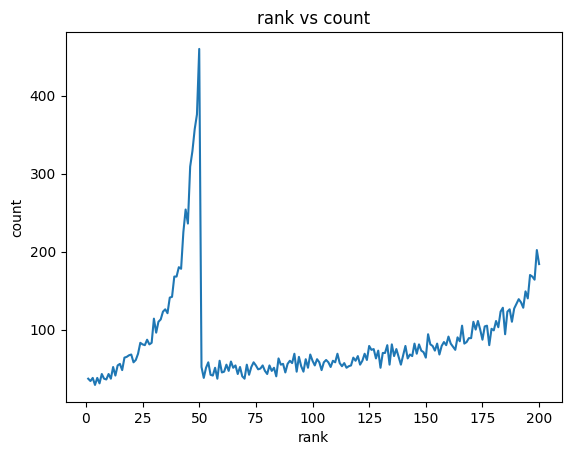

In [180]:
import matplotlib.pyplot as plt
# plot the data
plt.plot(df_final_position)

# set the plot title and axis labels
plt.title('rank vs count')
plt.xlabel('rank')
plt.ylabel('count')

# show the plot
plt.show()



In [183]:
rows_top_ten = len(df_final[(df_final['rank'] <= 10)& (df_final['rank']!= 0)])
rows_top_40 = len(df_final[(df_final['rank'] <= 40)& (df_final['rank']!= 0)])
rows_top_10_40 = len(df_final[(df_final['rank'] <= 40)& (df_final['rank'] >= 10)])
rows_top_40_200 = len(df_final[(df_final['rank'] <= 200)& (df_final['rank']>= 40)])
rows_one = len(df_final[(df_final['rank'] == 1)])
rows_zero = len(df_final[(df_final['rank'] == 0)])
rows_over_200 = len(df_final[(df_final['rank'] >200)])
rows_total = len(df_final)

print("rows top 10:", rows_top_ten, int((rows_top_ten/rows_total)*100))
print("rows top 40:", rows_top_40, int((rows_top_40/rows_total)*100))
print("rows 10 to 40:", rows_top_10_40, int((rows_top_10_40/rows_total)*100))
print("rows 40 to 200:", rows_top_40_200, int((rows_top_40_200/rows_total)*100))
print("rows 40 to 200:", rows_one, int((rows_one/rows_total)*100))
print("rows 1:", rows_one, int((rows_one/rows_total)*100))
#print("rows 0:", rows_zero, int((rows_zero/rows_total)*100))
#print("rows over 200:", rows_over_200, int((rows_over_200/rows_total)*100))
print("total rows:", rows_total)


rows top 10: 366 2
rows top 40: 3023 17
rows 10 to 40: 2700 15
rows 40 to 200: 14275 83
rows 40 to 200: 37 0
rows 1: 37 0
total rows: 17130


In [187]:
viral_50 = len(df_final[(df_final['chart'] == 'viral50')])
print(viral_50)
top_200 = len(df_final[(df_final['chart'] == 'top200')])
print(top_200)

4485
12645
